In [1]:
import geopandas as gpd
import pandas as pd
import os
import getpass
import matplotlib.pyplot as plt
from earthpy.clip import clip_shp

In [2]:
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]

#crs is set for Central Texas
crs =  {'init' :'epsg:6578'}

parks = gpd.read_file(wd+"data/coaparks/parkboundaries.geojson")
parks = parks.to_crs(crs).explode().reset_index()

pop = gpd.read_file(wd+"data/blockgroups_censusdata/popcount.geojson")
pop = pop.to_crs(crs).explode().reset_index()
#parks.head(5)

,level_0,level_1,ASSET_MGMT,LOCATION_N,ADDRESS,CITY_MUNIC,COUNTY,STATE,STREET_NUM,STREET_NAM,...,MXPRIORITY,MXLOADID,GLOBALID,CREATED_BY,CREATED_DA,MODIFIED_B,MODIFIED_D,Shape__Are,Shape__Len,geometry
0,0,0,412,Stratford Overlook Greenbelt,"3006 Stratford Dr., Austin, Texas 78746",Austin,Travis,TX,3006,Stratford,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,4.403262e+03,420.672106,"POLYGON ((3099906.430145309 10076413.8900397, ..."
1,1,0,413,Highland Neighborhood Park,"403 W St Johns Ave., Austin, Texas 78752",Austin,Travis,TX,403,W St Johns,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.048800e+04,422.279483,"POLYGON ((3123253.446115231 10095987.26952804,..."
2,2,0,354,Palma Plaza Pocket Park,"1524 Palma Plz., Austin, Texas 78703",Austin,Travis,TX,1524,Palma,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.007678e+04,492.661534,"POLYGON ((3109560.790101637 10075621.86012769,..."
3,3,0,398,Oertli Neighborhood Park,"12613 Blaine Rd., Austin, Texas 78753",Austin,Travis,TX,12613,Blaine,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,2.671883e+05,2404.916487,"POLYGON ((3142167.801987223 10117512.55423328,..."
4,4,0,370,Decker Tallgrass Prairie Preserve,"8001 Decker Ln., Austin, Texas 78724",Austin,Travis,TX,8001,Decker,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.515843e+07,26672.772067,"POLYGON ((3155053.009484472 10084108.48488672,..."


In [3]:
pop['full_area'] = pop['geometry'].area
pop.head()


,level_0,level_1,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,...,jurisdic_3,modified_f,objectid,shape_area,shape_leng,Id,Id2,Estimate;,geometry,full_area
0,0,0,48,209,010901,1000,482090109011000,Block 1000,G5040,None,...,34.0,210.0,110.0,7.752723e+09,2.049691e+06,1500000US482090109011,482090109011,2205,"POLYGON ((3069235.856359433 10028018.79442929,...",3.246548e+06
1,0,1,48,209,010901,1000,482090109011000,Block 1000,G5040,None,...,34.0,210.0,110.0,7.752723e+09,2.049691e+06,1500000US482090109011,482090109011,2205,"POLYGON ((3060337.982900123 10029835.09477461,...",1.955843e+07
2,1,0,48,209,010908,1002,482090109081002,Block 1002,G5040,None,...,34.0,210.0,110.0,7.752723e+09,2.049691e+06,1500000US482090109081,482090109081,3774,"POLYGON ((3093546.031100261 10008632.89993141,...",1.837685e+03
3,2,0,48,453,000101,1002,484530001011002,Block 1002,G5040,None,...,34.0,210.0,110.0,7.752723e+09,2.049691e+06,1500000US484530001011,484530001011,1045,"POLYGON ((3111307.928720258 10089475.92878409,...",1.023445e+07
4,3,0,48,453,000101,2020,484530001012020,Block 2020,G5040,None,...,34.0,210.0,110.0,7.752723e+09,2.049691e+06,1500000US484530001012,484530001012,1202,"POLYGON ((3109353.91885116 10091523.83983915, ...",1.190645e+07


In [4]:
parks.columns
parks.head()

,level_0,level_1,ASSET_MGMT,LOCATION_N,ADDRESS,CITY_MUNIC,COUNTY,STATE,STREET_NUM,STREET_NAM,...,MXPRIORITY,MXLOADID,GLOBALID,CREATED_BY,CREATED_DA,MODIFIED_B,MODIFIED_D,Shape__Are,Shape__Len,geometry
0,0,0,412,Stratford Overlook Greenbelt,"3006 Stratford Dr., Austin, Texas 78746",Austin,Travis,TX,3006,Stratford,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,4.403262e+03,420.672106,"POLYGON ((3099906.430145309 10076413.8900397, ..."
1,1,0,413,Highland Neighborhood Park,"403 W St Johns Ave., Austin, Texas 78752",Austin,Travis,TX,403,W St Johns,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.048800e+04,422.279483,"POLYGON ((3123253.446115231 10095987.26952804,..."
2,2,0,354,Palma Plaza Pocket Park,"1524 Palma Plz., Austin, Texas 78703",Austin,Travis,TX,1524,Palma,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.007678e+04,492.661534,"POLYGON ((3109560.790101637 10075621.86012769,..."
3,3,0,398,Oertli Neighborhood Park,"12613 Blaine Rd., Austin, Texas 78753",Austin,Travis,TX,12613,Blaine,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,2.671883e+05,2404.916487,"POLYGON ((3142167.801987223 10117512.55423328,..."
4,4,0,370,Decker Tallgrass Prairie Preserve,"8001 Decker Ln., Austin, Texas 78724",Austin,Travis,TX,8001,Decker,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.515843e+07,26672.772067,"POLYGON ((3155053.009484472 10084108.48488672,..."


In [5]:
data = {'Park_Name':[],
       'Calc_Pop':[]}

from shapely.geometry import Polygon
names = parks['LOCATION_N'].unique()
# for i, dfrow in parks.iterrows():
#      name = dfrow['LOCATION_N']

for i,name in enumerate(names):
    park = parks.loc[parks['LOCATION_N'] == name]
    park['geometry'] = park['geometry'].buffer(1320)
    print(i, name)
    
    is_in_park = False
    for j, dfrow in pop.iterrows(): # iterate over pop shapes
#         print(dfrow['geometry'].is_valid)
        for n, dfrow2 in park.iterrows(): # iterate over buffered park shape
            # check if any pop shps fall within the buffered park shapes
            if Polygon(dfrow['geometry']).intersects(Polygon(dfrow2['geometry'])):
                is_in_park = True
                break
    if is_in_park:
        pop_valid = pop.copy()
        pop_valid['geometry'] = pop_valid['geometry'].buffer(0) # fix invalid polygons by buffering them by zero distances
        # definetly a hack and should be looked into.
        pop_clip = clip_shp(pop_valid,park)

        pop_clip['new_area'] = pop_clip['geometry'].area
        pop_clip['weight'] = pop_clip['new_area']/ pop_clip['full_area']
        pop_clip['new_pop'] = pop_clip['weight'] * pop_clip['Estimate;']

        data['Park_Name'].append(name)
        data['Calc_Pop'].append(pop_clip['new_pop'].sum())
    else: # if no pop blocks are within the park then return 0
        data['Park_Name'].append(name)
        data['Calc_Pop'].append(0)

print(park.head())


#names.head()

C:\Users\Victoria\Anaconda3\envs\park_env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0 Stratford Overlook Greenbelt
1 Highland Neighborhood Park
2 Palma Plaza Pocket Park
3 Oertli Neighborhood Park
4 Decker Tallgrass Prairie Preserve
5 Oakwood Cemetery
6 Peace Point at Town Lake Metro Park
7 Norwood Tract at Town Lake Metro Park
8 Mayfield Park
9 Kennemer Pool
10 Norman School Park
11 Lucy Read School Park
12 Caswell Tennis Center
13 Country Club Creek Greenbelt
14 Odom School Park
15 Murchison Pool
16 Oakwood Annex Cemetery
17 Stephenson Nature Preserve & Outdoor Education Center
18 Stillhouse Hollow Nature Preserve
19 John Trevino Jr. Metro Park at Morrison Ranch
20 Hartford Planting Strip
21 Wooldridge Square
22 Heritage Oaks Neighborhood Park
23 North Acres Greenbelt
24 Evergreen Cemetery

25 Davis/White Northeast Neighborhood Park
26 Conley-Guerrero Senior Activity Center
27 Harris Triangle
28 Longview Neighborhood Park
29 Dick Nichols District Park
30 Eilers (Deep Eddy) Neighborhood Park
31 Mabel Davis District Park
32 Tom Lasseter-South Lamar Neighborhood Park
3

262 Onion Creek Soccer Complex
263 Reed Neighborhood Park
264 Riata Neighborhood Park
265 East Boggy Creek Greenbelt
266 West Bouldin Creek Greenbelt
267 West Austin Neighborhood Park
268 Swede Hill Pocket Park
269 Red Bud Isle
270 Westenfield Neighborhood Park
271 Buttermilk Branch Greenbelt
272 Buttermilk Neighborhood Park
273 Beverly S. Sheffield Northwest District Park
274 Symphony Square
275 Seiders Springs at Shoal Creek Greenbelt
276 Lawrence Street Pocket Park
277 Marble Creek Greenbelt
278 Slaughter Creek Greenbelt
279 Marble Creek Neighborhood Park
280 Red Bluff Nature Preserve
281 Republic Square
282 Nicholas Dawson Neighborhood Park
283 Ramsey Neighborhood Park
284 Hancock Golf Course
285 Zilker Metro Park
286 Old San Antonio District Park
287 Ricky Guerrero Neighborhood Park
288 South Austin Tennis Center
289 Blunn Creek Greenbelt
290 Barton Creek Wilderness Park
291 Barton Creek Greenbelt
292 William H. Russell Karst Preserve
293 Holly Shores at Town Lake Metro Park
294 L

In [6]:
df = pd.DataFrame(data)
df['Calc_Pop'] = df['Calc_Pop'].astype(int)

df.head(10)

,Park_Name,Calc_Pop
0,Stratford Overlook Greenbelt,4953
1,Highland Neighborhood Park,1073
2,Palma Plaza Pocket Park,1288
3,Oertli Neighborhood Park,710
4,Decker Tallgrass Prairie Preserve,184
5,Oakwood Cemetery,1742
6,Peace Point at Town Lake Metro Park,1894
7,Norwood Tract at Town Lake Metro Park,2227
8,Mayfield Park,1196
9,Kennemer Pool,2722


In [7]:
df2= df.loc[~df['Park_Name'].str.contains('Cemetery')].reset_index()
df2

,index,Park_Name,Calc_Pop
0,0,Stratford Overlook Greenbelt,4953
1,1,Highland Neighborhood Park,1073
2,2,Palma Plaza Pocket Park,1288
3,3,Oertli Neighborhood Park,710
4,4,Decker Tallgrass Prairie Preserve,184
...,...,...,...
292,297,Red Bluff Neighborhood Park,1027
293,298,MLK Station Neighborhood Park,2286
294,299,Louis René Barrera Indiangrass Wildlife Sanctuary,126
295,300,Garrison District Park,2138


KeyError: 'geometry'

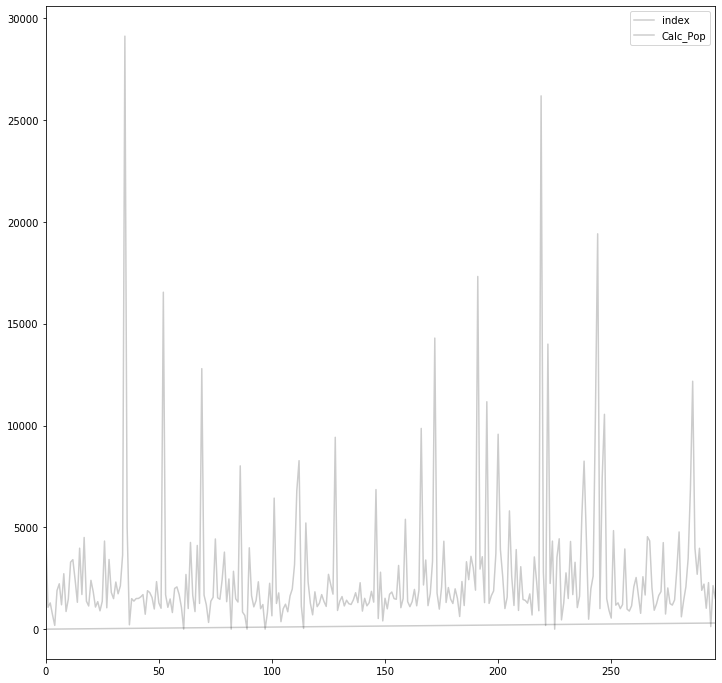

In [9]:
incomemerger = cbgroups3.merge(income, left_on='GEOID10', right_on='Id2', suffixes=('_cbgroups3', '_incometable'))
incomemerger.to_file(wd+"data/blockgroups_censusdata/incomemerge.shp")
incomemerger